In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('NFLX.csv')

features = df[['Open', 'High', 'Low', 'Volume']].values
target = df['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_scaled, test_size=0.2, random_state=42)

class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.bias_input_hidden = np.random.rand(hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.bias_hidden_output = np.random.rand(output_size)
        self.learning_rate = learning_rate
        self.loss_history = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, inputs):
        self.hidden_activations = self.sigmoid(np.dot(inputs, self.weights_input_hidden) + self.bias_input_hidden)
        self.output_activations = self.sigmoid(np.dot(self.hidden_activations, self.weights_hidden_output) + self.bias_hidden_output)
        return self.output_activations

    def backward(self, inputs, targets):

        output_error = targets - self.output_activations
        output_delta = output_error * self.sigmoid_derivative(self.output_activations)

        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_activations)

        self.weights_hidden_output += self.hidden_activations.T.dot(output_delta) * self.learning_rate
        self.bias_hidden_output += np.sum(output_delta, axis=0) * self.learning_rate
        self.weights_input_hidden += inputs.T.dot(hidden_delta) * self.learning_rate
        self.bias_input_hidden += np.sum(hidden_delta, axis=0) * self.learning_rate

    def train(self, inputs, targets, epochs=1000):
        for epoch in range(epochs):
            for i in range(len(inputs)):
                input_data = inputs[i:i+1]
                target = targets[i:i+1]

                self.forward(input_data)

                self.backward(input_data, target)

            error = np.mean(np.square(targets - self.forward(inputs)))
            self.loss_history.append(error)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}/{epochs}, Error: {error}")

Epoch 0/500, Error: 0.03968410195898716
Epoch 100/500, Error: 0.00024726794039334513
Epoch 200/500, Error: 0.00015770520008011717
Epoch 300/500, Error: 0.0001426704957336016
Epoch 400/500, Error: 0.00013282425771445557


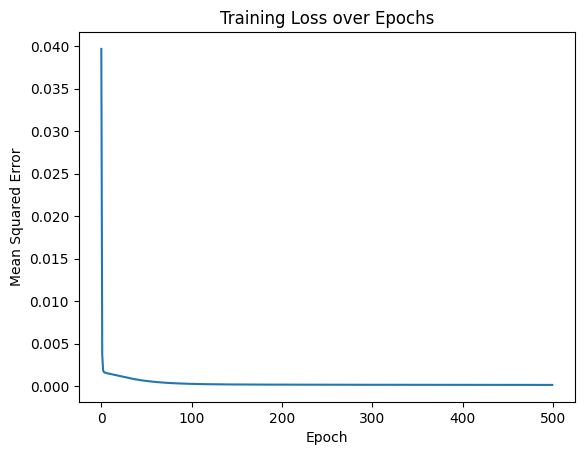

In [3]:
mlp = MLP(input_size=X_train.shape[1], hidden_size=5, output_size=1, learning_rate=0.1)
mlp.train(X_train, y_train, epochs=500)

plt.plot(mlp.loss_history)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss over Epochs')
plt.show()

predictions_scaled = mlp.forward(X_test)

predictions = scaler.inverse_transform(predictions_scaled)
y_test_original = scaler.inverse_transform(y_test)

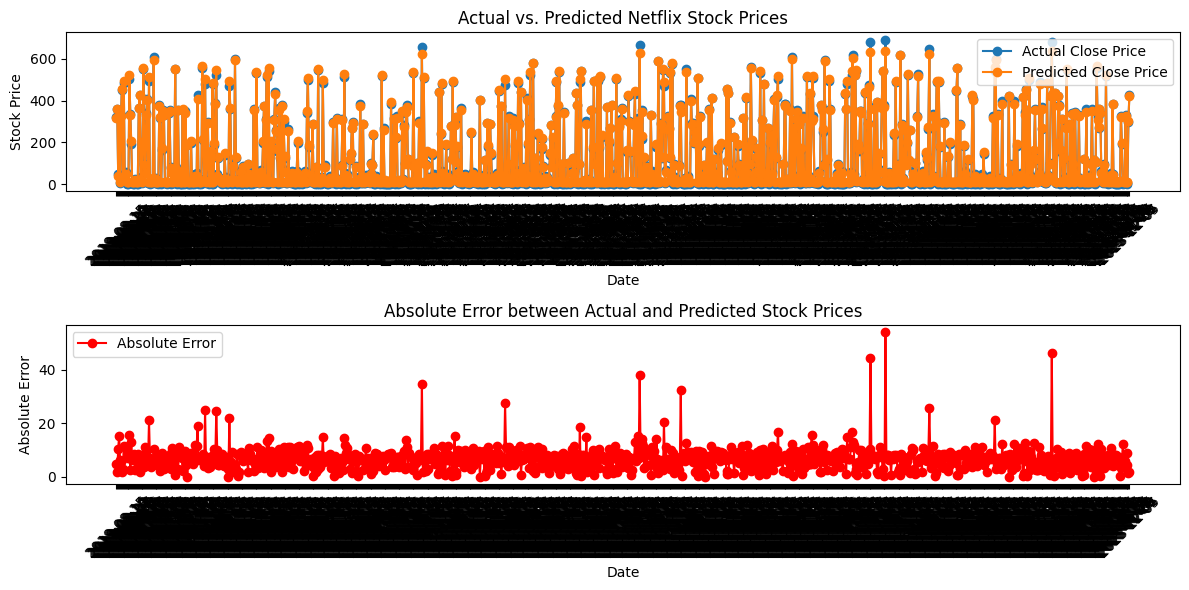

In [4]:
error = np.abs(y_test_original - predictions)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df['Date'][-len(y_test):], y_test_original, label='Actual Close Price', marker='o')
plt.plot(df['Date'][-len(predictions):], predictions, label='Predicted Close Price', marker='o')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Netflix Stock Prices')
plt.legend()
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
plt.plot(df['Date'][-len(error):], error, label='Absolute Error', color='red', marker='o')
plt.xlabel('Date')
plt.ylabel('Absolute Error')
plt.title('Absolute Error between Actual and Predicted Stock Prices')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()